In [1]:
from transformers import ViTForImageClassification
import torch

from torchvision.transforms.functional import pil_to_tensor
from datasets import load_dataset

device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(42)
torch.cuda.manual_seed(42)

/home/fano/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = ViTForImageClassification.from_pretrained("facebook/deit-tiny-patch16-224")

In [3]:
st = model.state_dict()

for k, v in st.items():
    print(k , v.shape)

vit.embeddings.cls_token torch.Size([1, 1, 192])
vit.embeddings.position_embeddings torch.Size([1, 197, 192])
vit.embeddings.patch_embeddings.projection.weight torch.Size([192, 3, 16, 16])
vit.embeddings.patch_embeddings.projection.bias torch.Size([192])
vit.encoder.layer.0.attention.attention.query.weight torch.Size([192, 192])
vit.encoder.layer.0.attention.attention.query.bias torch.Size([192])
vit.encoder.layer.0.attention.attention.key.weight torch.Size([192, 192])
vit.encoder.layer.0.attention.attention.key.bias torch.Size([192])
vit.encoder.layer.0.attention.attention.value.weight torch.Size([192, 192])
vit.encoder.layer.0.attention.attention.value.bias torch.Size([192])
vit.encoder.layer.0.attention.output.dense.weight torch.Size([192, 192])
vit.encoder.layer.0.attention.output.dense.bias torch.Size([192])
vit.encoder.layer.0.intermediate.dense.weight torch.Size([768, 192])
vit.encoder.layer.0.intermediate.dense.bias torch.Size([768])
vit.encoder.layer.0.output.dense.weight torc

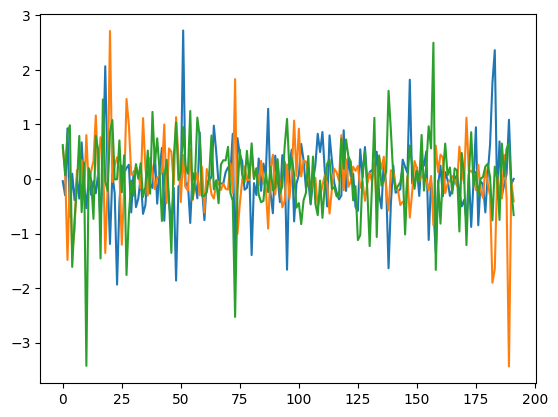

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline


copy_tensor = st["vit.embeddings.position_embeddings"]


plt.plot(copy_tensor[:, 10].squeeze(0))
plt.plot(copy_tensor[:, 100].squeeze(0))
plt.plot(copy_tensor[:, 196].squeeze(0))

In [5]:
model = model.eval().to(device)

dataset = load_dataset("huggingface/cats-image", trust_remote_code=True)
image = pil_to_tensor(dataset["test"]["image"][0].resize((224, 224))).unsqueeze(0).to(device)
image = image.type(torch.float32) / 255.

# print(image.shape)
with torch.no_grad():
    out = model(image).logits
    print(out.shape)

# print(out)

predicted_label = out.argmax(-1).item()

# print(out)
print(model.config.id2label[predicted_label])

torch.Size([1, 1000])
Egyptian cat
